# Alan Chanthaboune - Covid Pipeline
Please see my contact below:

achanthaboune@gmail.com

https://www.linkedin.com/in/alan-chanthaboune-7255ab172/

> Congratulations! You’ve just been hired as a Data Engineer at a biotech research firm. Your first project is to build out a data pipeline to ingest Covid-19 statistics data then perform exploration on that data to answer some questions that your team has been eager to figure out.


# Number 1


> Hit the Covid tracking API endpoint above and retrieve data for the entire month of both January and February 2021. The dataset should contain the following fields: `date`, `state`, `cases`, `population_percent`, `change_from_prior_day`, `seven_day_change_percent`. You are welcomed to use any Python libraries or frameworks you desire to accomplish this task. Show the code for this process in your script/notebook.


Below will be my thought process throughout this test as I can't display it on a takehome

> **Alan's Brain**: Let's test the water here first.  Let's grab the first date of January and see what the data looks like to understand the size and schema

In [107]:
#import libraries
from urllib.request import urlopen
import json
import pandas as pd


#Grab the API URL
response = urlopen("https://api.covidtracking.com/v2/states/ca/2021-01-01.json")

#Read the URL
json_data = response.read().decode('utf-8', 'replace')

#parse a valid JSON string and convert it into a Python Dictionary
d = json.loads(json_data)
#Normalize semi-structured JSON data into a flat table.
df = pd.json_normalize(d['data'])




In [108]:
display(df)

,date,state,meta.data_quality_grade,meta.updated,meta.tests.total_source,cases.total.value,cases.total.calculated.population_percent,cases.total.calculated.change_from_prior_day,cases.total.calculated.seven_day_change_percent,cases.confirmed.value,...,outcomes.death.confirmed.value,outcomes.death.confirmed.calculated.population_percent,outcomes.death.confirmed.calculated.change_from_prior_day,outcomes.death.confirmed.calculated.seven_day_change_percent,outcomes.death.confirmed.calculated.seven_day_average,outcomes.death.probable.value,outcomes.death.probable.calculated.population_percent,outcomes.death.probable.calculated.change_from_prior_day,outcomes.death.probable.calculated.seven_day_change_percent,outcomes.death.probable.calculated.seven_day_average
0,2021-01-01,CA,B,2021-01-01T07:59:00Z,totalTestsViral,2292568,5.836,47189,12.3,2292568,...,None,None,None,None,None,None,None,None,None,None


> **Alan's Brain**: Great!  Now that I got a general grasp of how the JSON is strucutred, let us go ahead and grab the remaining dates

In [109]:
from datetime import timedelta, datetime,date

#start and end_date to increment day by day
start_date=datetime(2021, 1, 2)
end_date=datetime(2021, 2, 28)
curr_date=start_date

for i in range((end_date - start_date).days+1):
    #Grab the API URL    
    response = urlopen("https://api.covidtracking.com/v2/states/ca/"+curr_date.strftime("%Y-%m-%d")+".json")

    #Read the URL
    json_data = response.read().decode('utf-8', 'replace')

    #parse a valid JSON string and convert it into a Python Dictionary
    d = json.loads(json_data)

    #Normalize semi-structured JSON data into a flat table.
    df_append = pd.json_normalize(d['data'])
    df=pd.concat([df_append, df])
    curr_date += timedelta(days=1)
    
    


In [110]:
#Grab the columns we want
df=df[["date","state","cases.total.value","cases.total.calculated.population_percent","cases.total.calculated.change_from_prior_day","cases.total.calculated.seven_day_change_percent"]]
#make the columns more readable
df=df.rename(columns={
    "cases.total.value":"cases",
    "cases.total.calculated.population_percent":"population_percent",
    "cases.total.calculated.change_from_prior_day":"change_from_prior_day",
    "cases.total.calculated.seven_day_change_percent":"seven_day_change_percent"})


In [111]:
display(df)

,date,state,cases,population_percent,change_from_prior_day,seven_day_change_percent
0,2021-02-28,CA,3475562,8.8474,4685,1.0
0,2021-02-27,CA,3470877,8.8355,5151,1.0
0,2021-02-26,CA,3465726,8.8223,5400,1.1
0,2021-02-25,CA,3460326,8.8086,4965,1.1
0,2021-02-24,CA,3455361,8.7960,5303,1.1
0,2021-02-23,CA,3450058,8.7825,3447,1.1
0,2021-02-22,CA,3446611,8.7737,4665,1.2
0,2021-02-21,CA,3441946,8.7618,6760,1.2
0,2021-02-20,CA,3435186,8.7446,6668,1.3
0,2021-02-19,CA,3428518,8.7276,6798,1.4


# Number 2


> Save that data to a “data lake” (AWS S3, GCP Cloud Storage, Azure Blob, etc.). You do not have to actually connect and write the data file to a real cloud storage bucket in your script/notebook. Just show what that code would look like in your script/notebook.

> **Alan's Brain**: I've never used AWS before.  In the job description it mentions AWS.  Let use AWS S3 as our datalake!

In [112]:
#pip install boto3
#Connect python to the S3 Bucket
import boto3
s3 = boto3.resource(
    service_name='s3',
    region_name='us-east-2',
    aws_access_key_id='',
    aws_secret_access_key=''#In a production enviroment this would be hidden in another file
)
#take our dataframe and convert it to a CSV and upload it to the cloud
df.to_csv('covid_data.csv',index=False,header=None)
s3.Bucket('achanthaboune').upload_file(Filename='covid_data.csv', Key='covid_data.csv')

# 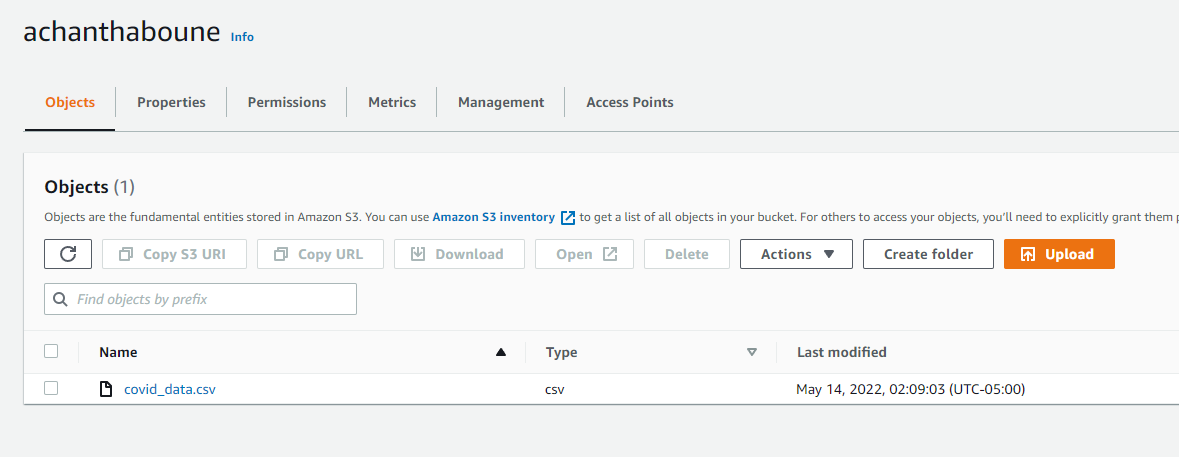

# Number 3


> Spin up either a local instance of a free relational database (Postgres, Mysql, etc.) or create a free trial account for a cloud-native relational database (Snowflake, Redshift, AWS RDS, etc.). You will soon copy the data file from your “data lake” to this database.

> **Alan's Brain**: I always thought Snowflake was interesting.  Never touched Snowflake before but lets give it a go!

# Number 4


> Create a table in your database to store the Covid statistics data from your data file. Your table should have the following columns: `date`, `state`, `cases`, `population_percent`, `change_from_prior_day`, `seven_day_change_percent` and `weekday_name` ("Monday", "Tuesday", etc.). Show the `CREATE TABLE` statement in your script/notebook
    - Questions to keep in mind:
        * What data type would you declare for each column?
        * What constraints, if any, would you declare for your table? Why?

In [113]:
#connect python to snowflake
import snowflake.connector

snowflake_conn = snowflake.connector.connect(
user = "achanthaboune",
password = "3Amf12$fwx",
account = "ri79604.us-east-2.aws",
database='public'
)

sql ="""USE MDB.PUBLIC;"""
cur = snowflake_conn.cursor()
cur.execute(sql)


In [114]:

sql ="""drop table if exists mdb.public.covid_data;"""

cur.execute(sql)

sql ="""CREATE TABLE mdb.public.covid_data 
  ( 
     date  date NOT NULL, 
     state    VARCHAR(2) PRIMARY KEY NOT NULL, 
     cases int,    
     population_percent decimal(10,5),  
     change_from_prior_day int,
     seven_day_change_percent decimal(10,2), 
     weekday_name varchar(10)
  );"""
cur.execute(sql)

> **Alan's Brain**: By dropping and recreating the table I can ensure that the table is refreshed without any duplicates.  This have its pros and cons as we can't incrementally add data to this table


# Number 5


> Copy the data file into the table you just created above. Again, the file being copied into your table does not need to be from a cloud storage bucket. However, you should actually copy that data file (presumably from your local disk) into your local/cloud database so that you query it later. Show your “copy into” statement in your script/notebook.
    * Questions to keep in mind:
        * How would you populate the `weekday_name` field?
        * How would you make sure that the data you’re copying into the table doesn’t already exist (thus duplicating data)?

In [115]:

sql = """copy into mdb.public.covid_data
from (select 
    t.$1,
    t.$2,
    t.$3,
    t.$4,
    t.$5,
    t.$6,
    null as weekday_name from @my_s3_stage/covid_data.csv t);"""

cur.execute(sql)

sql = """update mdb.public.covid_data set weekday_name=dayname(date)"""

num1=cur.execute(sql)

cur.close()

True

>**Alan's Brain**:Ideally during the COPY INTO I would populate weekday_name with the date conversion DAYNAME but Snowflake do not currently support this so I'll just update after the table been loaded with data

       **SQL Compilation error: Function 'DAYNAME' not supported within a COPY**

# Number 6


> Finally, answer the below questions regarding the Covid statistics dataset you ingested by querying your table using a **single** SQL query for each of the three question. Show the SQL query (`SELECT` statements) for each question in your script/notebook.
    1. Which week day (`weekday_name`) in January had more combined cases than any other week day? Return a single `weekday_name` value.
    2. What date in January had the second highest case change from prior day? Return a single `date` value.
    3. What are the single worst dates in terms of cases for January and February? What is the case count for these two dates? What day of the week (`weekday_name`) are these two dates? Return two rows, one for each month, with the `date`, `cases` and `weekday_name` values for these two dates.

#  Number 6.1 
> Which week day (weekday_name) in January had more combined cases than any other week day? Return a single weekday_name value.

In [116]:
select 
    top 1 weekday_name 
from 
    mdb.public.covid_data 
where 
    date like ('%2021-01%') 
group by 
    weekday_name 
order by 
    sum(cases)desc


IndentationError: unexpected indent (3262267738.py, line 2)

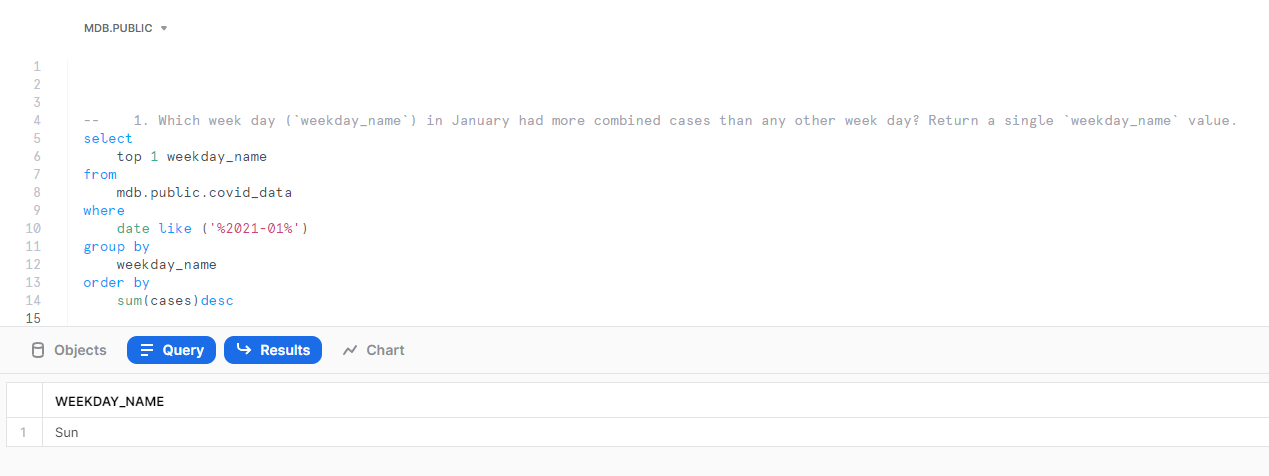

#  Number 6.2 
> What date in January had the second highest case change from prior day? Return a single `date` value.

In [ ]:
select 
    top 1 date 
from 
    mdb.public.covid_data 
where 
    date like ('%2021-01%') 
and
   change_from_prior_day<>(select max(change_from_prior_day) from mdb.public.covid_data where date like ('%2021-01%'))
order by change_from_prior_day desc;

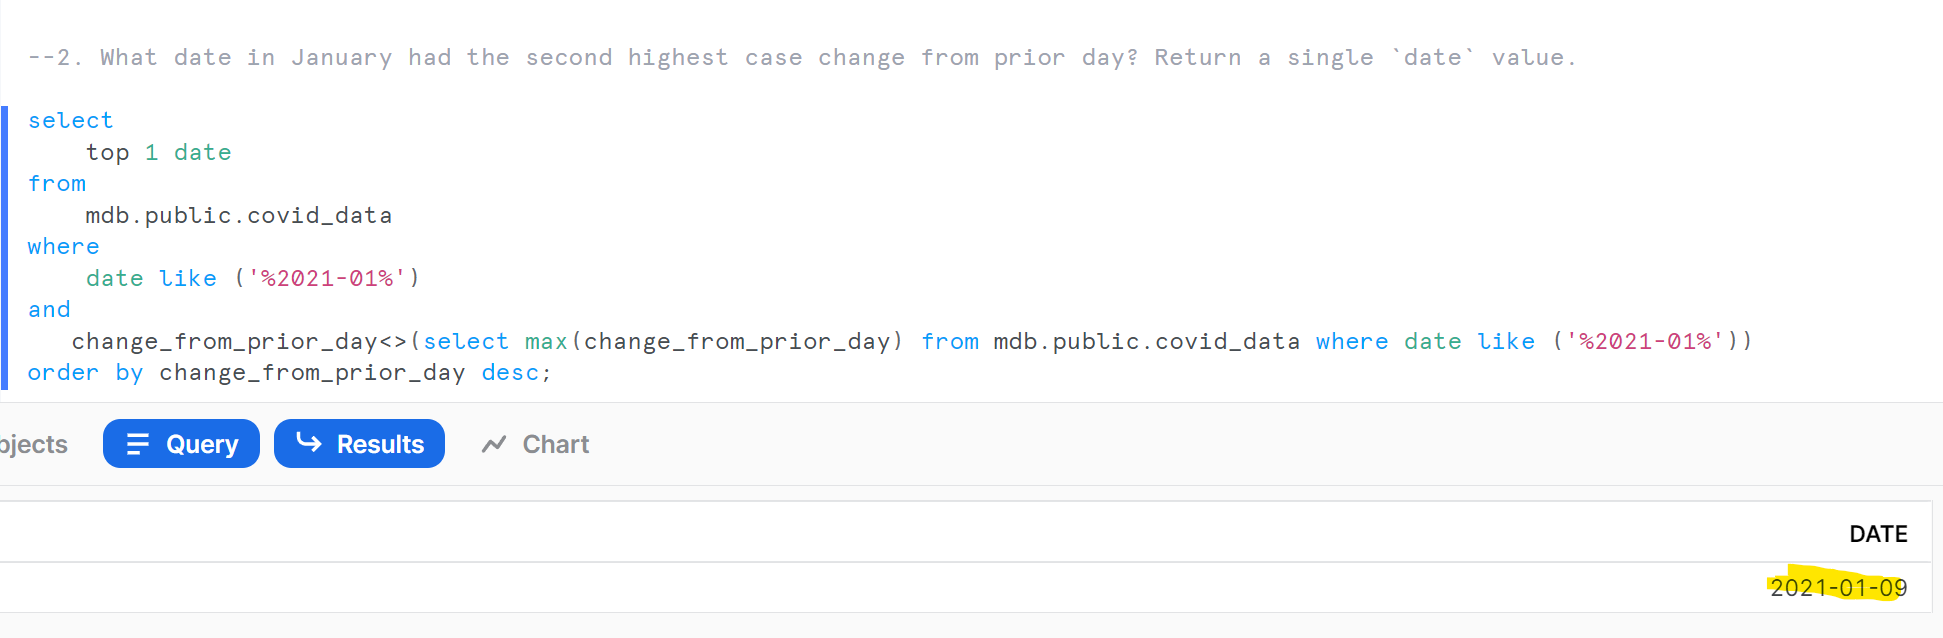

#  Number 6.3
> What are the single worst dates in terms of cases for January and February? What is the case count for these two dates? What day of the week (`weekday_name`) are these two dates? Return two rows, one for each month, with the `date`, `cases` and `weekday_name` values for these two dates.


In [ ]:
select date,cases,weekday_name from
(
    select date,cases,dense_rank() over (partition by monthname(date) order by cases desc) as rnk,weekday_name from mdb.public.covid_data
) where rnk=1

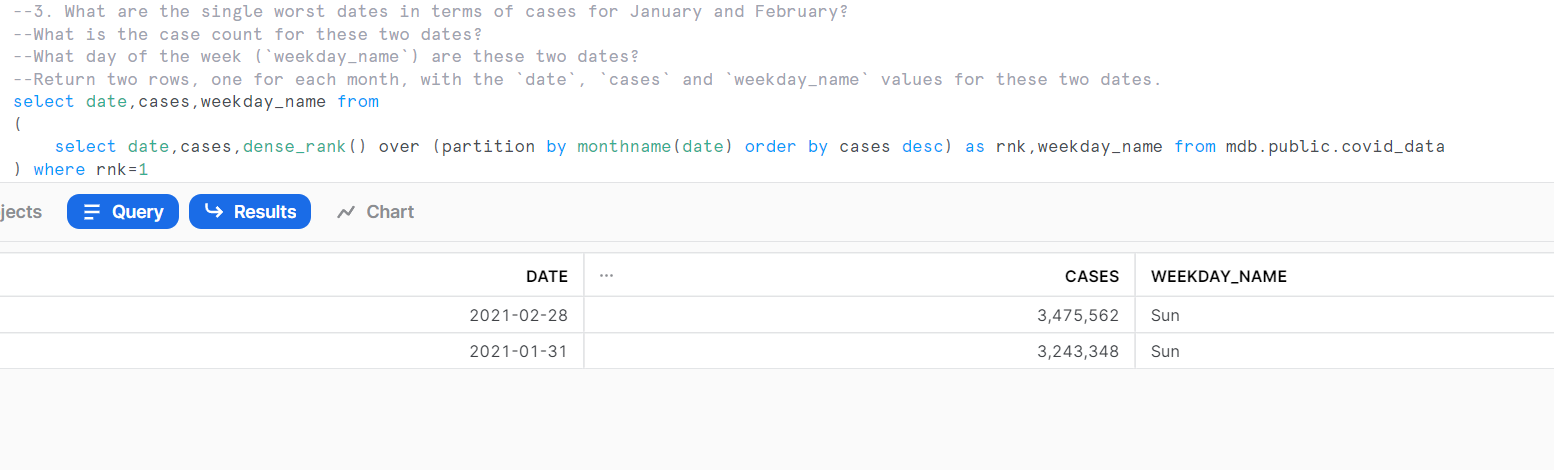

## Next steps 🏃

Thank you!  I love learning new things and taking on new challanges.  Looking foward to hearing back from the team